In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("train.csv", usecols=['Age', 'Fare', 'Survived'])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [3]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
X = df.drop("Survived",axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

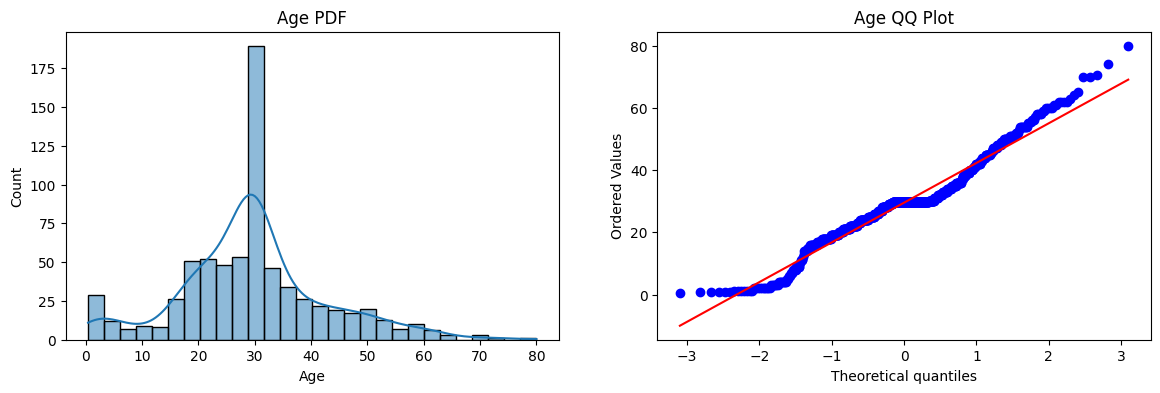

In [6]:
plt.figure(figsize=(14,4))

# PDF / Distribution
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title("Age PDF")

# QQ Plot
plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title("Age QQ Plot")

# plt.tight_layout()
plt.show()

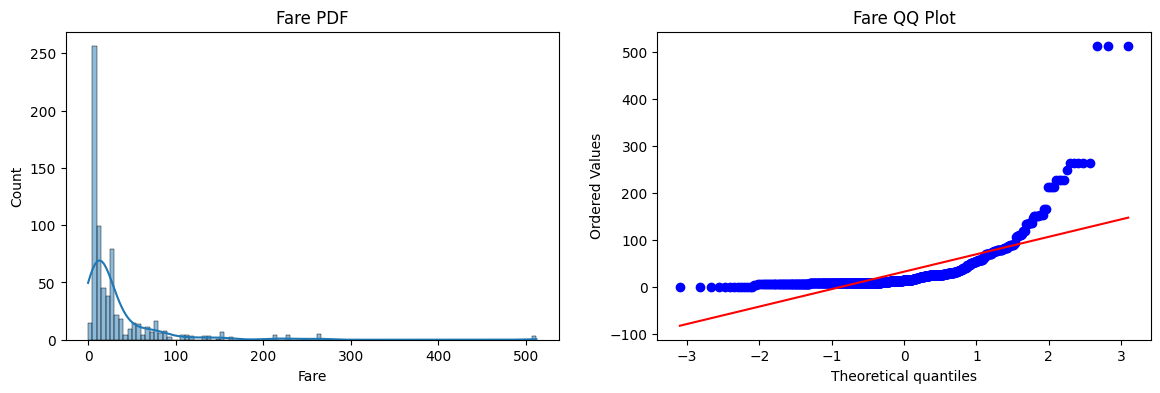

In [7]:
plt.figure(figsize=(14,4))

# PDF / Distribution
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title("Fare PDF")

# QQ Plot
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title("Fare QQ Plot")

# plt.tight_layout()
plt.show()

In [8]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy clf1:", accuracy_score(y_test, y_pred1))
print("Accuracy clf2:", accuracy_score(y_test, y_pred2))

Accuracy clf1: 0.6480446927374302
Accuracy clf2: 0.6536312849162011


### Log Transformation

In [9]:
trf = FunctionTransformer(func=np.log1p)

In [10]:
X_train_transformed = trf.fit_transform(X_train)
X_test_trandformed = trf.transform(X_test)

In [11]:
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()

clf3.fit(X_train_transformed, y_train)
clf4.fit(X_train_transformed, y_train)

y_pred3 = clf3.predict(X_test_trandformed)
y_pred4 = clf4.predict(X_test_trandformed)

print("Accuracy clf3:", accuracy_score(y_test, y_pred3))
print("Accuracy clf4:", accuracy_score(y_test, y_pred4))

Accuracy clf3: 0.6815642458100558
Accuracy clf4: 0.6759776536312849


In [12]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR:", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT:", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR: 0.678027465667915
DT: 0.6599500624219725


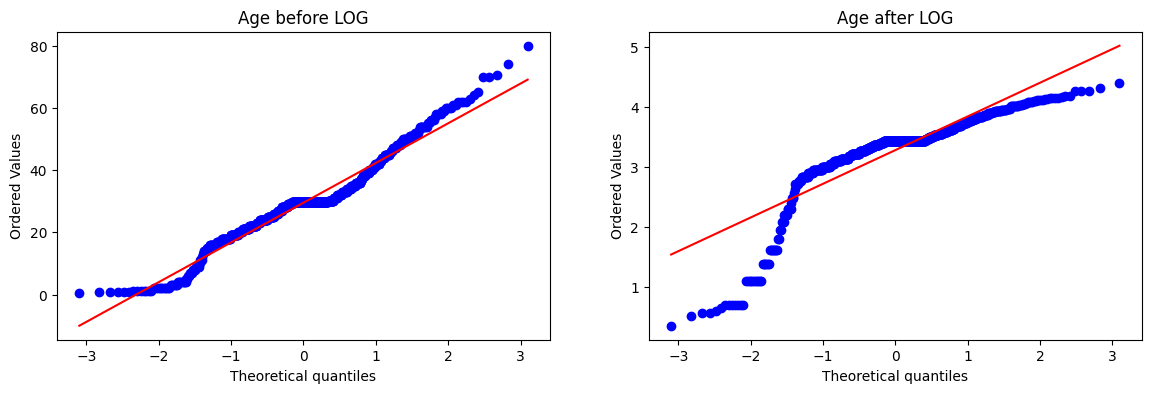

In [13]:
plt.figure(figsize=(14,4))

# PDF / Distribution
plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title("Age before LOG")

# QQ Plot
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title("Age after LOG")

# plt.tight_layout()
plt.show()

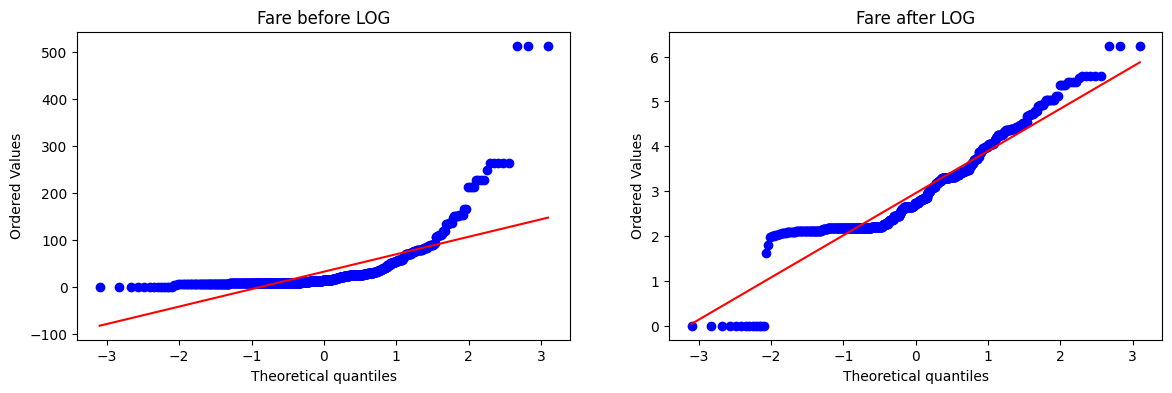

In [14]:
plt.figure(figsize=(14,4))

# PDF / Distribution
plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title("Fare before LOG")

# QQ Plot
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title("Fare after LOG")

# plt.tight_layout()
plt.show()

In [15]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_trandformed2 = trf2.transform(X_test)

In [16]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred1 = clf1.predict(X_test_trandformed2)
y_pred2 = clf2.predict(X_test_trandformed2)

print("Accuracy clf1:", accuracy_score(y_test, y_pred1))
print("Accuracy clf2:", accuracy_score(y_test, y_pred2))

Accuracy clf1: 0.6703910614525139
Accuracy clf2: 0.664804469273743


In [17]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR:", np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))
print("DT:", np.mean(cross_val_score(clf2, X_transformed2, y, scoring='accuracy', cv=10)))

LR: 0.6712609238451936
DT: 0.6621972534332085


In [18]:
def apply_transform(transform):
    X = df.drop("Survived",axis=1)
    y = df['Survived']

    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy:", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14,4))

    # PDF / Distribution
    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title("Fare before transform")
    
    # QQ Plot
    plt.subplot(122)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title("Fare after transform")
    
    # plt.tight_layout()
    plt.show()

Accuracy: 0.61729088639201


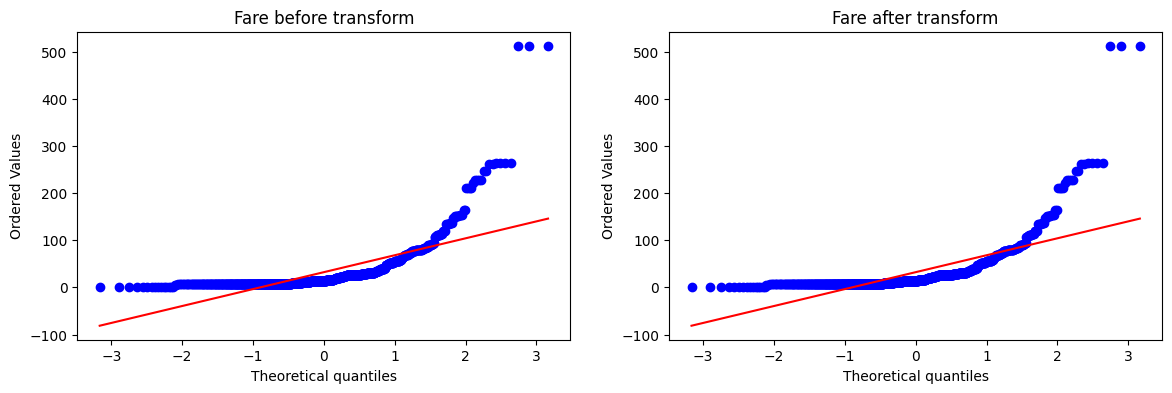

In [19]:
apply_transform(lambda x: 1/(x + 0.0000001))